# Task 1

In [27]:
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import random
from scipy import sparse

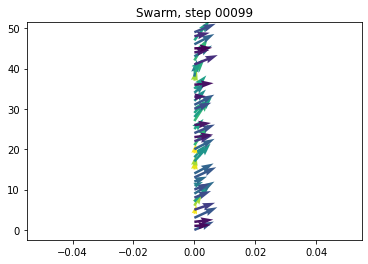

In [32]:
# initializing our birds positions
def initialize_birds(L, N):
    x_positons = np.random.uniform(0, L - 1, N)
    y_positons = np.random.uniform(0, L - 1, N) 

    combined = np.vstack((x_positons, y_positons)).T
    return combined


# we have to make a 2d vector of velocities
def initialize_velocities(positions, v_0):

    xes = positions[0:, 0:1]
    yes = positions[0:, 1:] * 1j
    z = xes + yes

    angles = np.angle(z)
    vx = v_0 * np.cos(angles)
    vy = v_0 * np.sin(angles)    

    combined = np.column_stack((vx, vy))
    return combined


# calculating angles of birds vs horiontal line
def calc_angles(positions):

    xes = positions[0:, 0:1]
    yes = positions[0:, 1:] * 1j
    z = xes + yes

    angles = np.angle(z)
    return angles


# add noise in radians
def add_noise(noise_val_degrees, number):
    noise = np.random.uniform(-noise_val_degrees, noise_val_degrees, number)
    noise_radians = np.radians(noise)

    return noise_radians


def update_angles(dist, angles, noise_degrees):

    dist_copy = dist.copy()
    dist_copy_dense = dist_copy.todense()
    dist_no_zero = dist_copy_dense != 0
    dist_copy_dense[dist_no_zero] = 1

    exp_angles_vec = np.exp(1j * angles)
    sum_average_direction = np.dot(dist_copy_dense, exp_angles_vec)
    noise = add_noise(noise_degrees, N)
    noise_matrix = np.asmatrix(noise).T
    new_angles = np.angle(sum_average_direction) + a * noise_matrix
    return new_angles   


def apply_boundary_conditions(positions, new_x, new_y, L):
    # boundary conditions
    new_x = np.where(new_x < L, new_x, new_x - L)
    new_x = np.where(new_x > 0, new_x, new_x + L)

    new_y = np.where(new_y < L, new_y, new_y - L)
    new_y = np.where(new_y > 0, new_y, new_y + L)

    positions[0:, 0:1] = new_x
    positions[0:, 1:] = new_y


# Initialization parameters

L = 12
N = 50
r = 1
r_b = 4
v_0 = 2
a = 0.15
noise_degrees = 60

t_steps = 100

#  Here we initialize our birds postions and velocities
positions = initialize_birds(L, N)
velocities = initialize_velocities(positions, v_0)
angles = calc_angles(positions)

for t in range(t_steps):

    # Creation of birds tree
    angles = calc_angles(positions) 
    birds_tree = cKDTree(positions, boxsize=[L,L])
    dist = birds_tree.sparse_distance_matrix(birds_tree,max_distance=r,output_type='coo_matrix')

    new_angles = update_angles(dist, angles, noise_degrees)

    new_x = positions[0:, 0:1] + v_0 * np.cos(new_angles) 
    new_y = positions[0:, 1:] + v_0 * np.sin(new_angles)   

    apply_boundary_conditions(positions, new_x, new_y, L)

    # Plot birds 
    plt.clf()
    #plt.quiver(np.asarray(positions[0:, 0:1]), np.asarray(positions[0:, 1:]), np.asarray(positions[0:, 0:1]), np.asarray(positions[0:, 1:]), angles)
    plt.quiver(np.asarray(positions[0:, 0:1]), np.asarray(positions[0:, 1:]), angles)
    nStr = str(t) 
    nStr = nStr.rjust(5, '0')
    plt.title("Swarm, step " + nStr)
    plt.savefig('img' + nStr + '.png')


### Delete plots

In [31]:
import os

dir_name = "D:\Matieriały_magisterskie\sem_1\Computer modeling of complex systems\cmcs_lab_3"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".png"):
        os.remove(os.path.join(dir_name, item))

### Make animation

In [30]:

from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=160, loop=0)

IndexError: list index out of range

In [ ]:
x_dir = np.cos(angles)
y_dir = np.sin(angles)
y_dir

array([[0.70581278],
       [0.94301988],
       [0.69148024],
       [0.75405844],
       [0.80261058],
       [0.09171217],
       [0.81566895],
       [0.70135372],
       [0.9813882 ],
       [0.72206201],
       [0.48675563],
       [0.70571675],
       [0.9990285 ],
       [0.83184784],
       [0.98278   ],
       [0.75309511],
       [0.73886609],
       [0.94186764],
       [0.98025865],
       [0.73243699],
       [0.72816071],
       [0.75399498],
       [0.91964772],
       [0.81366899],
       [0.73765127],
       [0.70769997],
       [0.68793729],
       [0.75871239],
       [0.70197964],
       [0.15997712],
       [0.73197724],
       [0.90767807],
       [0.17526382],
       [0.76502128],
       [0.98124831],
       [0.28702594],
       [0.70511713],
       [0.74532536],
       [0.72800581],
       [0.67918824],
       [0.71237672],
       [0.79685024],
       [0.67882869],
       [0.9312497 ],
       [0.73676217],
       [0.25999022],
       [0.80496886],
       [0.912